#task1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[feature_names]),
                              columns=feature_names, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[feature_names]),
                             columns=feature_names, index=X_test.index)

In [7]:
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,-1.842585e-16,1.00124,-0.406141,-0.397976,-0.377675,-0.045821,9.630689
ZN,404.0,5.056461e-17,1.00124,-0.500320,-0.500320,-0.500320,0.364589,3.824227
INDUS,404.0,3.074548e-15,1.00124,-1.487791,-0.850273,-0.352167,1.033237,2.433163
CHAS,404.0,-5.056461e-17,1.00124,-0.278089,-0.278089,-0.278089,-0.278089,3.595975
NOX,404.0,-5.221483e-15,1.00124,-1.458711,-0.888783,-0.157233,0.633861,2.675394
RM,404.0,-4.031016e-15,1.00124,-3.461733,-0.600349,-0.149443,0.452824,3.477564
AGE,404.0,-1.001124e-15,1.00124,-2.348206,-0.822826,0.327020,0.897473,1.124581
DIS,404.0,-3.176777e-16,1.00124,-1.258391,-0.808198,-0.297120,0.748198,3.907900
RAD,404.0,-3.654942e-17,1.00124,-0.974048,-0.624360,-0.507797,0.308141,1.706891
TAX,404.0,-1.534457e-16,1.00124,-1.307684,-0.753356,-0.446066,1.578434,1.849573


In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


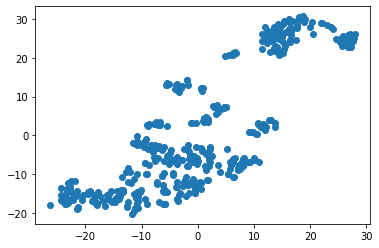

In [58]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

#task2

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [42]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42, max_iter=100)

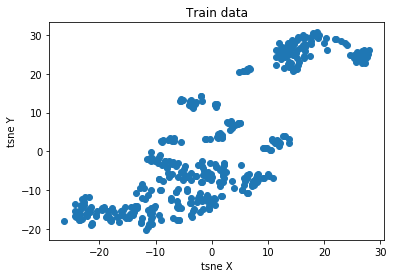

In [48]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.xlabel('tsne X')
plt.ylabel('tsne Y')

plt.title('Train data')

plt.show()

In [64]:
train_labels = model.fit_predict(X_train_tsne)

plt.scatter(train_labels[:, 0], train_labels[:, 1])

plt.show()


IndexError: too many indices for array

In [61]:
centers = scaler.inverse_transform(model.cluster_centers_)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')

plt.title('Train data')

ValueError: operands could not be broadcast together with shapes (3,2) (13,) (3,2) 